In [2]:
from pyforbes import ForbesList
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
flist = ForbesList()
richest400_df = flist.get_df("billionaires", year =2022)



### lets see how many years of data we have => we only have 1997 -> 2022 data

In [3]:
for i in range(1990,2022):
    try :
        flist.get_df("billionaires", year =i)
    except:
        print(i ," is missing")

1990  is missing
1991  is missing
1992  is missing
1993  is missing
1994  is missing
1995  is missing
1996  is missing


### number of billionaires through time

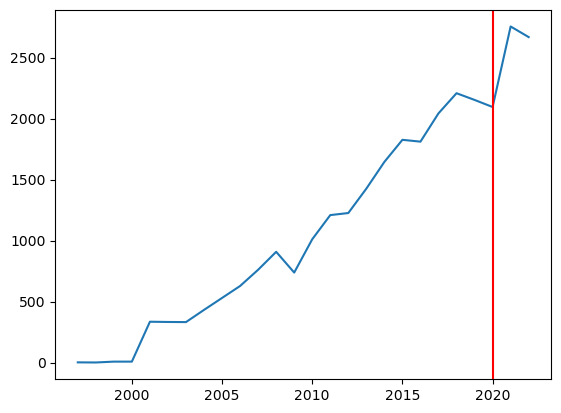

In [5]:
number_billionaires = []
for i in range(1997,2023):
    df = flist.get_df("billionaires", year =i)
    number_billionaires.append(df.shape[0])
plt.plot(np.arange(1997,2023),number_billionaires,label="Number of billionaires")
plt.axvline(x = 2020,color="red",label="covid")
plt.show()

In [6]:
richest400_df.head()

,name,year,month,uri,rank,listUri,finalWorth,category,otherCompensation,person,...,numberOfSiblings,numberOfSiblingsEst,bio,notableDeal,valueCreated,primaryIndustry,portraitImage,landscapeImage,recentEarnings,assetsUnderManagement
0,Billionaires,2022,4,elon-musk,1,billionaires,219000.0,Automotive,0,"{'name': 'Elon Musk', 'uri': 'elon-musk', 'ima...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Billionaires,2022,4,jeff-bezos,2,billionaires,171000.0,Technology,0,"{'name': 'Jeff Bezos', 'uri': 'jeff-bezos', 'i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Billionaires,2022,4,bernard-arnault,3,billionaires,158000.0,Fashion & Retail,0,"{'name': 'Bernard Arnault & family', 'uri': 'b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Billionaires,2022,4,bill-gates,4,billionaires,129000.0,Technology,0,"{'name': 'Bill Gates', 'uri': 'bill-gates', 'i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Billionaires,2022,4,warren-buffett,5,billionaires,118000.0,Finance & Investments,0,"{'name': 'Warren Buffett', 'uri': 'warren-buff...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#checking if 
richest400_df.person[0]["name"]

'Elon Musk'

In [9]:
richest400_df.to_csv('2022_data.csv', sep=',')

### Creating the new name column because uri isn't the same as the Personname column from our original dataset

In [10]:
#we will use this function on every loaded dataset to have consistent names in each dataFrame 
def uri_to_name(data):
    lst = []
    for index, row in data.iterrows():
        lst.append(row['person']["name"])
    data.name = pd.Series(lst)
uri_to_name(richest400_df)
richest400_df.head()

,name,year,month,uri,rank,listUri,finalWorth,category,otherCompensation,person,...,numberOfSiblings,numberOfSiblingsEst,bio,notableDeal,valueCreated,primaryIndustry,portraitImage,landscapeImage,recentEarnings,assetsUnderManagement
0,Elon Musk,2022,4,elon-musk,1,billionaires,219000.0,Automotive,0,"{'name': 'Elon Musk', 'uri': 'elon-musk', 'ima...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jeff Bezos,2022,4,jeff-bezos,2,billionaires,171000.0,Technology,0,"{'name': 'Jeff Bezos', 'uri': 'jeff-bezos', 'i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bernard Arnault & family,2022,4,bernard-arnault,3,billionaires,158000.0,Fashion & Retail,0,"{'name': 'Bernard Arnault & family', 'uri': 'b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bill Gates,2022,4,bill-gates,4,billionaires,129000.0,Technology,0,"{'name': 'Bill Gates', 'uri': 'bill-gates', 'i...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Warren Buffett,2022,4,warren-buffett,5,billionaires,118000.0,Finance & Investments,0,"{'name': 'Warren Buffett', 'uri': 'warren-buff...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### testing if the column i created is exactly the same as the original data

In [11]:
original_data = pd.read_csv("forbes_2022_billionaires.csv")

In [12]:
#compares the two series
original_data.personName.compare(richest400_df.name)

,self,other
10,Gautam Adani & family,Gautam Adani
48,He Xiangjian,He Xiangjian & family
49,Miriam Adelson,Miriam Adelson & family
87,Fan Hongwei & family,Fan Hongwei
154,Lin Jianhua & family,Lin Jianhua
178,Xing Wang,Wang Xing
188,Richard Qiangdong Liu,Richard Liu
192,Shuirong Li,Li Shuirong
237,Li Ge,Ge Li
247,Paul Xiaoming Lee & family,Paul Lee


### I'll change the original column to the imported names since they are probably better formated

In [15]:
original_data["name"] = richest400_df.name
formatednames_data = original_data.drop("personName",axis=1)
formatednames_data.to_csv("forbes_2022_billionaires_goodnames.csv")

### functions 

In [16]:
def get_rank_wealth(name,year): #gives the rank and the wealth of the billionaire a certain year
    df = flist.get_df("billionaires", year =year)
    uri_to_name(df)
    if name in df.name.values:
        return int(df[df.name == name].finalWorth.index[0]+1),int(df[df.name == name].finalWorth.values[0]) #the +1 is used because we reccuperate the index of the sorted serie : the first is at index 0
    else:#if the name isnt in this year returns rank -1 and wealth 0
        return -1,0

get_rank_wealth("Elon Musk",2022)    

(1, 219000)

In [17]:
#Called rank_ column isntead of rank, it caused a weird bug
def list_of_wealth(name,start=1997,stop=2022):
    rank_wealth = pd.DataFrame(columns=["rank_","wealth"])

    for year in range(start,stop+1):
        print(year)
        rank,wealth = get_rank_wealth(name,year)
        
        rank_wealth = rank_wealth.append({"rank_":4,"wealth":wealth},ignore_index=True)
    return rank_wealth
    
elon=list_of_wealth("Elon Musk")
elon

1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


### NOT FINISHED i want to color each segment of the curve with the normalized value of there rank

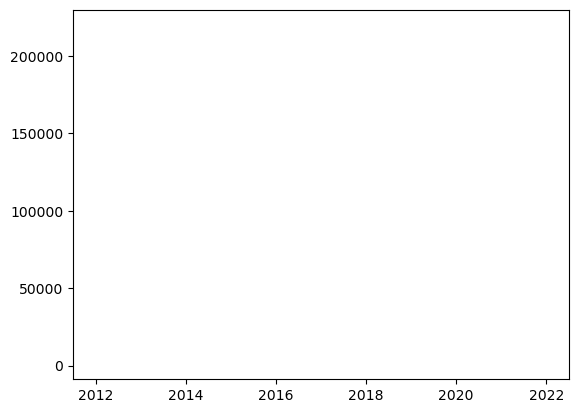

In [20]:
import matplotlib.colors as co
import matplotlib.cm as cm

fig, ax = plt.subplots()
years = np.arange(1997,2023)
for i in range(2023-1997):
    #i want to normalize the rank to map to a color
    norm = co.Normalize(vmin=1, vmax=number_billionaires[i]) #number_billionaires every year, we use it to scale the rank to color the curve
    w,r = elon.wealth[i],elon.rank_[i]
    if w!=0: #if data exists for this year, we plot it
        ax.plot(years[i], w,color=cm.hot(norm(r)),label="Elon Musk")
plt.show()